In [1]:
## Import modules
from matplotlib import pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### See here for xarray visualization docs
# http://xarray.pydata.org/en/stable/user-guide/plotting.html#datasets

In [49]:
# Load data
# path = '/Users/matthewgentry/CESM/munged/LENS/FG_CO2/b.e11.B1850C5CN.f09_g16.005.pop.h.FG_CO2.040001-220012.meanstate.nc'
path = '/Users/matthewgentry/Downloads/tos_Omon_CESM2_omip2_r1i1p1f1_gn_030601-036612.nc'
ds = xr.open_dataset(path, decode_times=False)
da = ds['tos']
da

/Users/matthewgentry/anaconda3/envs/cldmodenv/lib/python3.7/site-packages/xarray/conventions.py:362: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim)


<xarray.DataArray 'tos' (time: 732, nlat: 384, nlon: 320)>
[89948160 values with dtype=float32]
Coordinates:
    lat      (nlat, nlon) float64 ...
    lon      (nlat, nlon) float64 ...
  * nlat     (nlat) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * nlon     (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * time     (time) float64 1.113e+05 1.114e+05 ... 1.335e+05 1.336e+05
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        TEMP[:,0,:,:]
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    long_name:      Sea Surface Temperature
    mipTable:       Omon
    out_name:       tos
    prov:           Omon ((isd.003))
    realm:          ocean
    standard_name:  sea_surface_temperature
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface

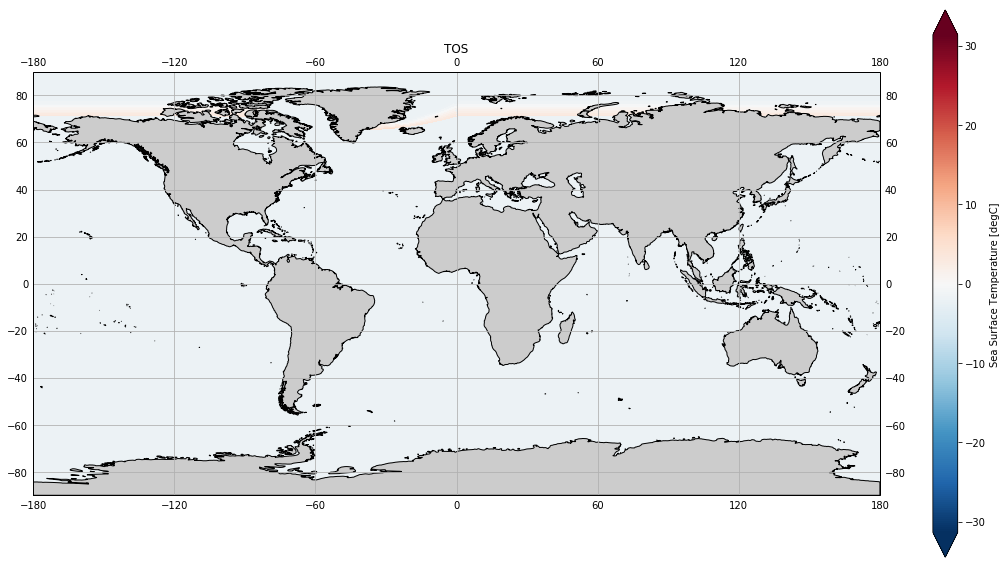

In [50]:
### Map with Coastlines
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=proj)
da.isel(time=0).plot(x='lon', y='lat',ax=ax, extend='both')
coast_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k', facecolor='0.8')
ax.add_feature(coast_50m)
ax.gridlines(draw_labels=True)
# plt.title('Air-Sea CO2 Flux')
ax.set_title('TOS', y=1.0, pad=20)
plt.tight_layout()
plt.show()

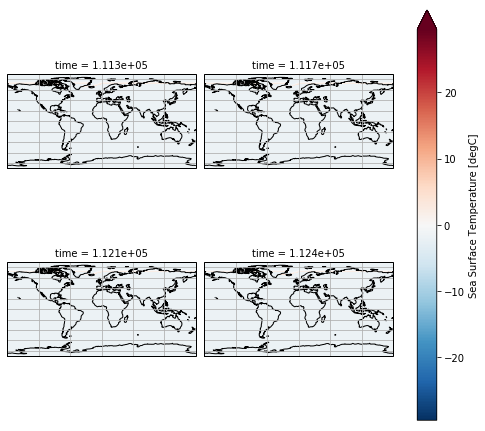

In [53]:
### Makes postage stamps with coastlines with less code
# does a separate plot for EVERY TIME STEP YOU SELECT
# This is slow even for three time steps
# see http://xarray.pydata.org/en/stable/user-guide/plotting.html#maps
p = da.isel(time=slice(0, 12*4 , 12)).plot(x='lon', y='lat',
        transform=ccrs.PlateCarree(),
        col="time", # the dimension that changes between subplots
        col_wrap=2, # number of subplots per row
        subplot_kws={"projection": ccrs.PlateCarree()}, # dict that accepts keyword args that would normally go to subplots
        robust=True # prevents outliers from overwhelming the plot
        )
# apply modificiations to each subplot
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()
    
plt.draw()